# Chinook Data Base Analysis
<hr style="margin-bottom: 40px;">
<img src="https://hips.hearstapps.com/amv-prod-gp.s3.amazonaws.com/gearpatrol/wp-content/uploads/2015/05/Record-Store-Day-Gear-Patrol-Lead-Full.jpg?crop=0.6711340206185566xw:1xh;center,top&resize=640:*"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

### What We Will Do:   
1. Import packages.
2. Connect to the data base.
3. Explore the data base.
4. Place all of our data into a pandas data frame.
5. Transform The data if necessary.
6. Analysis of our data.

In [2]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3


In [3]:
# Making a connection between sqlite3
# database and Python Program
conn = sqlite3.connect('data/Chinook_Sqlite.sqlite') 
# If sqlite3 makes a connection with python
# program then it will print "Connected to SQLite"
# Otherwise it will show errors
print("Connected to SQLite")
 
# Getting all tables from sqlite_master
sql_query = """SELECT name FROM sqlite_master
WHERE type='table';"""
 
# Creating cursor object using connection object
cursor = conn.cursor()
     
# Executing our sql query
cursor.execute(sql_query)
print("List of tables\n")
     
# Printing all tables list
print(cursor.fetchall())


Connected to SQLite
List of tables

[('Album',), ('Artist',), ('Customer',), ('Employee',), ('Genre',), ('Invoice',), ('InvoiceLine',), ('MediaType',), ('Playlist',), ('PlaylistTrack',), ('Track',)]


In [4]:
# Now were are going to use PRAGMA to figure out what is in these tables so we can join them together later
pd.read_sql('''PRAGMA table_info(Customer);''',conn)

,cid,name,type,notnull,dflt_value,pk
0,0,CustomerId,INTEGER,1,None,1
1,1,FirstName,NVARCHAR(40),1,None,0
2,2,LastName,NVARCHAR(20),1,None,0
3,3,Company,NVARCHAR(80),0,None,0
4,4,Address,NVARCHAR(70),0,None,0
5,5,City,NVARCHAR(40),0,None,0
6,6,State,NVARCHAR(40),0,None,0
7,7,Country,NVARCHAR(40),0,None,0
8,8,PostalCode,NVARCHAR(10),0,None,0
9,9,Phone,NVARCHAR(24),0,None,0


In [5]:
pd.read_sql('''PRAGMA table_info(Invoice);''',conn)

,cid,name,type,notnull,dflt_value,pk
0,0,InvoiceId,INTEGER,1,None,1
1,1,CustomerId,INTEGER,1,None,0
2,2,InvoiceDate,DATETIME,1,None,0
3,3,BillingAddress,NVARCHAR(70),0,None,0
4,4,BillingCity,NVARCHAR(40),0,None,0
5,5,BillingState,NVARCHAR(40),0,None,0
6,6,BillingCountry,NVARCHAR(40),0,None,0
7,7,BillingPostalCode,NVARCHAR(10),0,None,0
8,8,Total,"NUMERIC(10,2)",1,None,0


In [6]:
pd.read_sql('''PRAGMA table_info(InvoiceLine);''',conn)

,cid,name,type,notnull,dflt_value,pk
0,0,InvoiceLineId,INTEGER,1,None,1
1,1,InvoiceId,INTEGER,1,None,0
2,2,TrackId,INTEGER,1,None,0
3,3,UnitPrice,"NUMERIC(10,2)",1,None,0
4,4,Quantity,INTEGER,1,None,0


In [7]:
pd.read_sql('''PRAGMA table_info(Track);''',conn)

,cid,name,type,notnull,dflt_value,pk
0,0,TrackId,INTEGER,1,None,1
1,1,Name,NVARCHAR(200),1,None,0
2,2,AlbumId,INTEGER,0,None,0
3,3,MediaTypeId,INTEGER,1,None,0
4,4,GenreId,INTEGER,0,None,0
5,5,Composer,NVARCHAR(220),0,None,0
6,6,Milliseconds,INTEGER,1,None,0
7,7,Bytes,INTEGER,0,None,0
8,8,UnitPrice,"NUMERIC(10,2)",1,None,0


In [8]:
pd.read_sql('''PRAGMA table_info(MediaType);''',conn)

,cid,name,type,notnull,dflt_value,pk
0,0,MediaTypeId,INTEGER,1,None,1
1,1,Name,NVARCHAR(120),0,None,0


In [9]:
# Join all the data into a pandas data frame
df = pd.read_sql('''
    SELECT 
        Customer.CustomerId, Customer.Country, Customer.State, Customer.City, Customer.PostalCode,
        Invoice.Total AS UnitCost, Invoice.InvoiceDate,
        InvoiceLine.Quantity, 
        Track.UnitPrice, Track.Name AS TrackName,
        Genre.Name AS GenreName,
        MediaType.MediaTypeId
    FROM Customer
    JOIN Invoice 
        ON Customer.CustomerId == Invoice.CustomerId
    JOIN InvoiceLine 
        ON Invoice.InvoiceId == InvoiceLine.InvoiceId
    JOIN Track 
        ON InvoiceLine.TrackId == Track.TrackId
    JOIN Genre 
        ON Track.GenreId == Genre.GenreId
    JOIN MediaType
        ON MediaType.MediaTypeId == Track.MediaTypeId
''', conn, parse_dates=['InvoiceDate'])

df

,CustomerId,Country,State,City,PostalCode,UnitCost,InvoiceDate,Quantity,UnitPrice,TrackName,GenreName,MediaTypeId
0,2,Germany,None,Stuttgart,70174,1.98,2009-01-01,1,0.99,Balls to the Wall,Rock,2
1,2,Germany,None,Stuttgart,70174,1.98,2009-01-01,1,0.99,Restless and Wild,Rock,2
2,4,Norway,None,Oslo,0171,3.96,2009-01-02,1,0.99,Put The Finger On You,Rock,1
3,4,Norway,None,Oslo,0171,3.96,2009-01-02,1,0.99,Inject The Venom,Rock,1
4,4,Norway,None,Oslo,0171,3.96,2009-01-02,1,0.99,Evil Walks,Rock,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,44,Finland,None,Helsinki,00530,13.86,2013-12-14,1,0.99,Looking For Love,Metal,1
2236,44,Finland,None,Helsinki,00530,13.86,2013-12-14,1,0.99,Sweet Lady Luck,Metal,1
2237,44,Finland,None,Helsinki,00530,13.86,2013-12-14,1,0.99,Feirinha da Pavuna/Luz do Repente/Bagaço da La...,Latin,1
2238,44,Finland,None,Helsinki,00530,13.86,2013-12-14,1,0.99,Samba pras moças,Latin,1


In [10]:
# Extract month and year
df["Month"] = df['InvoiceDate'].dt.strftime('%m')
df['Year'] = df['InvoiceDate'].dt.strftime('%Y')
df.head()


,CustomerId,Country,State,City,PostalCode,UnitCost,InvoiceDate,Quantity,UnitPrice,TrackName,GenreName,MediaTypeId,Month,Year
0,2,Germany,None,Stuttgart,70174,1.98,2009-01-01,1,0.99,Balls to the Wall,Rock,2,01,2009
1,2,Germany,None,Stuttgart,70174,1.98,2009-01-01,1,0.99,Restless and Wild,Rock,2,01,2009
2,4,Norway,None,Oslo,0171,3.96,2009-01-02,1,0.99,Put The Finger On You,Rock,1,01,2009
3,4,Norway,None,Oslo,0171,3.96,2009-01-02,1,0.99,Inject The Venom,Rock,1,01,2009
4,4,Norway,None,Oslo,0171,3.96,2009-01-02,1,0.99,Evil Walks,Rock,1,01,2009


In [11]:
# Sales Per Year
df['Year'].value_counts()

Year
2010    455
2009    454
2012    447
2011    442
2013    442
Name: count, dtype: int64

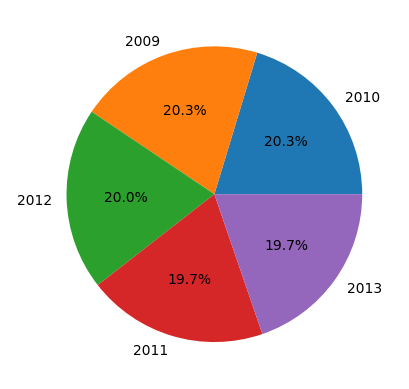

In [12]:
ax = df['Year'].value_counts().plot(kind='pie', ylabel=' ', legend=False, autopct='%1.1f%%')



In [91]:
# Sales Per Month
df['Month'].value_counts()

Month
03    190
05    190
06    190
07    190
08    190
10    190
12    190
01    188
04    186
02    180
09    180
11    176
Name: count, dtype: int64

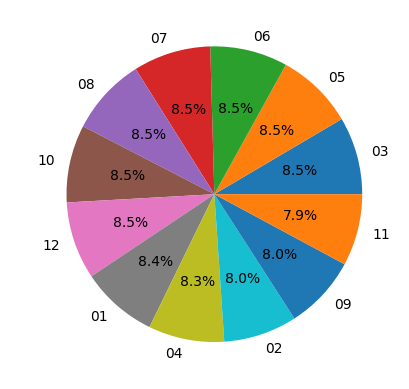

In [92]:
ax = df['Month'].value_counts().plot(kind='pie', ylabel=' ', legend=False, autopct='%1.1f%%')

In [94]:
# Quantity of sales by country
df['Country'].value_counts()

Country
USA               494
Canada            304
France            190
Brazil            190
Germany           152
United Kingdom    114
Czech Republic     76
Portugal           76
India              74
Australia          38
Chile              38
Ireland            38
Norway             38
Netherlands        38
Spain              38
Sweden             38
Belgium            38
Finland            38
Denmark            38
Italy              38
Poland             38
Austria            38
Hungary            38
Argentina          38
Name: count, dtype: int64

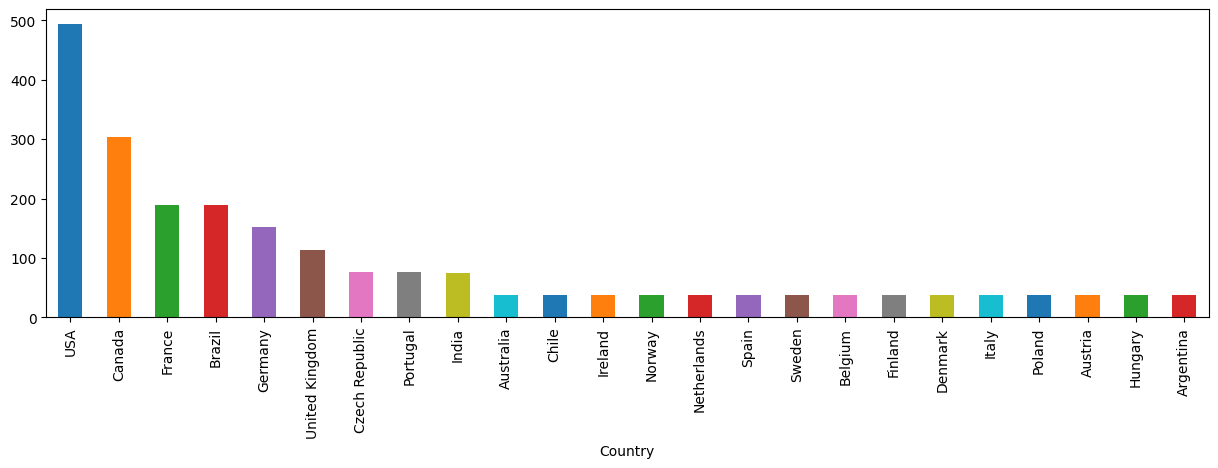

In [103]:
color_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
ax = df['Country'].value_counts().plot(kind='bar',figsize=(15,4),color=color_list, edgecolor=None)


In [179]:
# Number of unique tracks sold
df["TrackName"].unique().shape[0]

1888

In [112]:
# Number of tracks sold
df["TrackName"].value_counts()

TrackName
The Trooper                5
The Number Of The Beast    4
Sure Know Something        4
Eruption                   4
Untitled                   4
                          ..
Wildest Dreams             1
Wasting Love               1
Transylvania               1
Lord of Light              1
Samba pras moças           1
Name: count, Length: 1888, dtype: int64

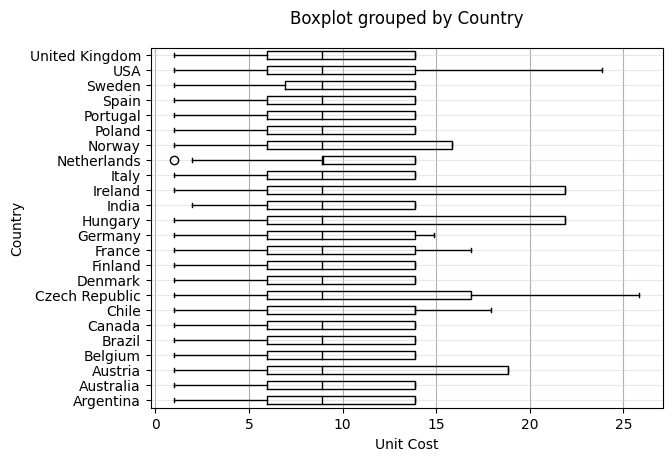

In [147]:
# Unit cost by country
ax = df[['UnitCost', 'Country']].boxplot(by='Country',vert=False, color='black')
ax.set_title('')
ax.set_xlabel('Unit Cost')
ax.set_ylabel('Country')
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)


In [189]:
# Sales per Genre
df['GenreName'].value_counts()

GenreName
Rock                  835
Latin                 386
Metal                 264
Alternative & Punk    244
Jazz                   80
Blues                  61
TV Shows               47
R&B/Soul               41
Classical              41
Reggae                 30
Drama                  29
Pop                    28
Soundtrack             20
Sci Fi & Fantasy       20
Hip Hop/Rap            17
Bossa Nova             15
Alternative            14
World                  13
Electronica/Dance      12
Heavy Metal            12
Easy Listening         10
Comedy                  9
Rock And Roll           6
Science Fiction         6
Name: count, dtype: int64

Text(24.0, 0.5, 'Count')

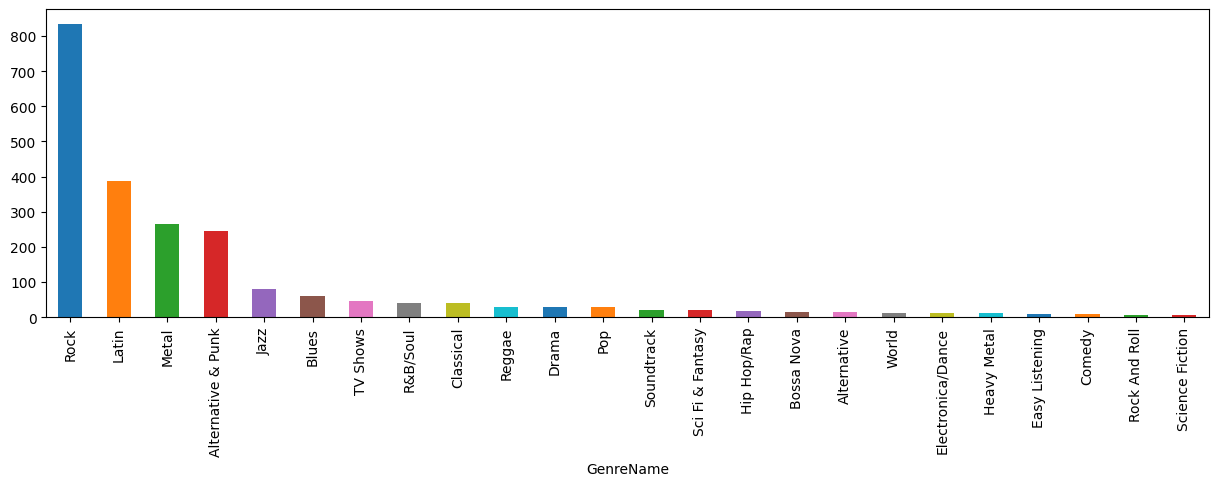

In [190]:
# Plot of sales per Genre
df['GenreName'].value_counts().plot(kind='bar',figsize=(15,4),color=color_list, edgecolor=None)
ax.set_ylabel('Count')

In [17]:
# Rock percentage of total sales
df.loc[(df['GenreName'] == 'Rock')].shape[0] / df.loc[(df['GenreName'] != 'Rock')].shape[0]

0.594306049822064

In [184]:
# Now lets take a look at the USA in specific.
# On average the USA has a sales tax of 5.1% so we will include it here (for fun).
df.loc[df['Country'] == 'United States', 'UnitPrice'] *= 0.051

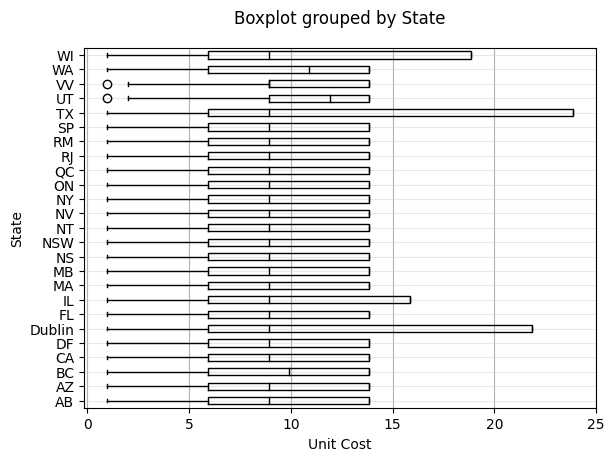

In [185]:
# Unit cost by state
ax = df[['UnitCost', 'State']].boxplot(by='State',vert=False, color='black')
ax.set_title('')
ax.set_xlabel('Unit Cost')
ax.set_ylabel('State')
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)

In [180]:
# Sales made outside of the USA
df.loc[(df['Country'] != 'USA')].shape[0]

1746

In [13]:
# USA percentage of total sales
df.loc[(df['Country'] == 'USA')].shape[0] / df.loc[(df['Country'] != 'USA')].shape[0]

0.2829324169530355

In [153]:
# Sales made by state in the USA
USAState = df.loc[df['Country'] == 'USA', 'State'].value_counts()
USAState

State
CA    114
MA     38
WA     38
NV     38
WI     38
AZ     38
TX     38
UT     38
FL     38
IL     38
NY     38
Name: count, dtype: int64

Text(0, 0.5, 'Count')

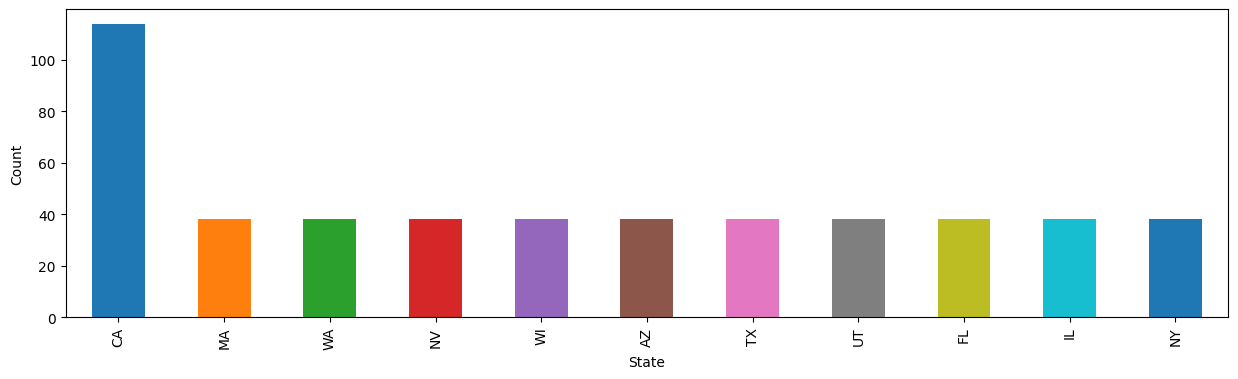

In [170]:
# Plot of sales by state
ax = USAState.plot(kind='bar',figsize=(15,4),color=color_list, edgecolor=None)
ax.set_ylabel('Count')


In [197]:
# Genre Sales In the USA
USAGenre = df.loc[df['Country'] == 'USA', 'GenreName'].value_counts()
USAGenre

GenreName
Rock                  157
Latin                  91
Metal                  64
Alternative & Punk     50
Jazz                   22
Blues                  15
TV Shows               14
R&B/Soul               12
Classical               8
Comedy                  8
Bossa Nova              7
Reggae                  6
Drama                   6
Alternative             5
Pop                     5
Sci Fi & Fantasy        5
Heavy Metal             4
Soundtrack              4
Hip Hop/Rap             4
Rock And Roll           3
Easy Listening          3
Science Fiction         1
Name: count, dtype: int64

Text(24.0, 0.5, 'Count')

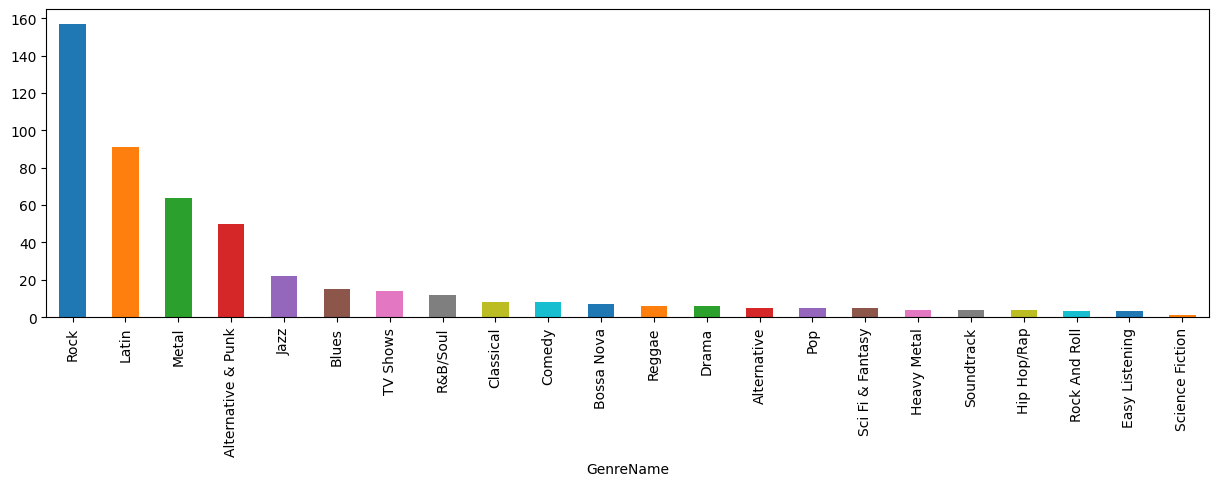

In [198]:
USAGenre.plot(kind='bar',figsize=(15,4),color=color_list, edgecolor=None)
ax.set_ylabel('Count')
